In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
import scipy.misc
from display_network import *
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [38]:
mndata = MNIST('../data/mnist/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X) # Sử dụng K-means để phân cụm dữ liệu

pred_label = kmeans.predict(X) # Dự đoán nhãn của dữ liệu

<class 'numpy.ndarray'>
(784, 10)


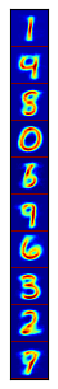

In [39]:
print(type(kmeans.cluster_centers_.T)) # Kiểm tra kiểu dữ liệu của kmeans.cluster_centers_.T
print(kmeans.cluster_centers_.T.shape) # Kiểm tra kích thước của kmeans.cluster_centers_.T
A = display_network(kmeans.cluster_centers_.T, K, 1) # Hiển thị các trung tâm cụm

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet") 
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()


In [40]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [41]:
N0 = 20; # Số lượng ảnh trong mỗi cụm
X1 = np.zeros((N0*K, 784)) # Mảng chứa các ảnh gần trung tâm cụm
X2 = np.zeros((N0*K, 784)) # Mảng chứa các ảnh đầu tiên trong cụm

for k in range(K):
    Xk = X0[pred_label == k, :] # Lấy các ảnh thuộc cụm k

    center_k = [kmeans.cluster_centers_[k]] # Trung tâm cụm k
    neigh = NearestNeighbors(n_neighbors = 20).fit(Xk) # Tìm 20 điểm gần trung tâm cụm k nhất
    dist, nearest_id  = neigh.kneighbors(center_k, N0) # Lấy các chỉ số của 20 điểm gần trung tâm cụm k nhất
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :] # Lấy các ảnh gần trung tâm cụm k
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :] # Lấy N0 ảnh đầu tiên trong cụm k

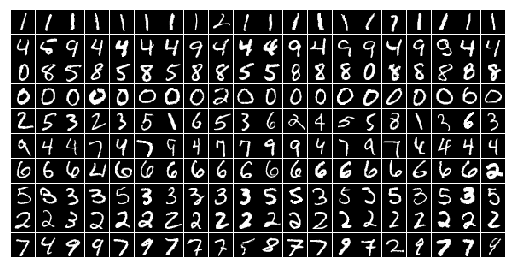

In [49]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()